<a href="https://colab.research.google.com/github/seawavve/kaggle_wavve/blob/main/strokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Data Set

In [2]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')
print(stroke.head())
stroke.shape

      id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]


(5110, 12)

In [14]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 679.0+ KB


In [4]:
stroke.drop_duplicates(inplace=True)
stroke.shape

(5110, 12)

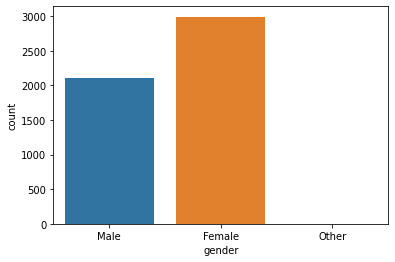

In [6]:
x=(stroke.gender.value_counts())
p = sns.countplot(data=stroke, x="gender")
plt.show()

In [13]:
#DataProcessing
#gender
ser=stroke['gender']
ser.replace('Male',0, inplace=True)
ser.replace('Female',1, inplace=True)
ser.replace('Other',2, inplace=True)
stroke['gender']=ser

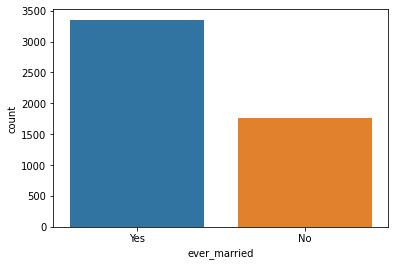

In [15]:
x=(stroke.ever_married.value_counts())
p = sns.countplot(data=stroke, x="ever_married")
plt.show()

In [16]:
#evermarried
ser=stroke['ever_married']
ser.replace('Yes',1, inplace=True)
ser.replace('No',0, inplace=True)
stroke['ever_married']=ser

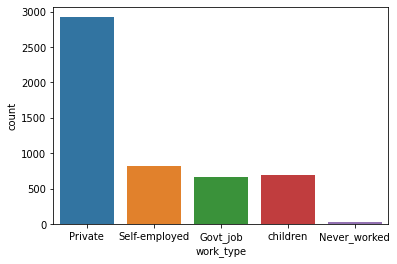

In [18]:
x=(stroke.work_type.value_counts())
p = sns.countplot(data=stroke, x="work_type")
plt.show()

In [19]:
#work_type
ser=stroke['work_type']
ser.replace('Private',0, inplace=True)
ser.replace('Self-employed',1, inplace=True)
ser.replace('Govt_job',2, inplace=True)
ser.replace('children',3, inplace=True)
ser.replace('Never_worked',4, inplace=True)
stroke['work_type']=ser

In [20]:
#Residence_type
ser=stroke['Residence_type']
ser.replace('Rural',0, inplace=True)
ser.replace('Urban',1, inplace=True)
stroke['Residence_type']=ser

In [21]:
#smoking_status
ser=stroke['smoking_status']
ser.replace('formerly smoked',0, inplace=True)
ser.replace('never smoked',1, inplace=True)
ser.replace('smokes',2, inplace=True)
ser.replace('Unknown',3, inplace=True)
stroke['smoking_status']=ser

In [23]:
ser=stroke['bmi']
ser.replace(np.nan,0,inplace=True)
stroke['bmi']=ser
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,51676,1,61.0,0,0,1,1,0,202.21,0.0,1,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,1,83.75,0.0,1,0
5106,44873,1,81.0,0,0,1,1,1,125.20,40.0,1,0
5107,19723,1,35.0,0,0,1,1,0,82.99,30.6,1,0
5108,37544,0,51.0,0,0,1,0,0,166.29,25.6,0,0


In [25]:
x = stroke.iloc[:, 1:-1].values
y = stroke.iloc[:, -1].values
x,y

(array([[  0.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   0.  ],
        [  1.  ,  61.  ,   0.  , ..., 202.21,   0.  ,   1.  ],
        [  0.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   1.  ],
        ...,
        [  1.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   1.  ],
        [  0.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   0.  ],
        [  1.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   3.  ]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [27]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (4088, 10) (4088,)
Shape for testing data (1022, 10) (1022,)


# Scaling

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Experiment(LogisticRegression,KNN, ...)

In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[967   1]
 [ 54   0]]
The accuracy of Logistic Regression is :  94.6183953033268 %


In [30]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  87.279843444227 %


In [31]:
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  94.12915851272015 %


In [32]:
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  94.71624266144813 %


In [33]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  94.71624266144813 %


In [34]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


[[931  37]
 [ 47   7]]
The accuracy of KNN is :  91.78082191780823 %


Text(0, 0.5, 'Error Rate')

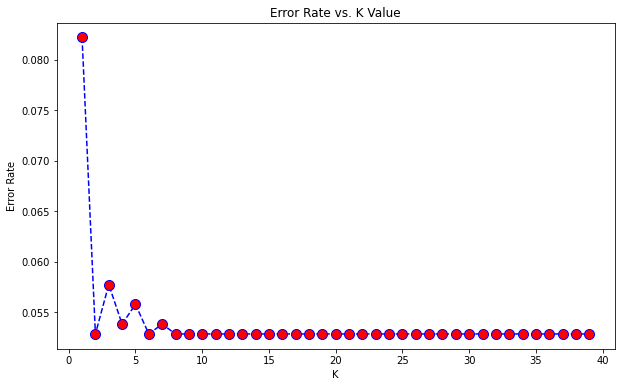

In [35]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
#window 9 is best
model = KNeighborsClassifier(n_neighbors = 9)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[967   1]
 [ 54   0]]
The accuracy of KNN is :  94.6183953033268 %


In [37]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  94.6183953033268 %
